In [1]:
import cv2
import numpy as np
#import syft
#import pysift
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:

sift = cv2.xfeatures2d.SIFT_create()


[ WARN:0@2.434] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [3]:
from numpy import all, any, array, arctan2, cos, sin, exp, dot, log, logical_and, roll, sqrt, stack, trace, unravel_index, pi, deg2rad, rad2deg, where, zeros, floor, full, nan, isnan, round, float32
from numpy.linalg import det, lstsq, norm
from cv2 import resize, GaussianBlur, subtract, KeyPoint, INTER_LINEAR, INTER_NEAREST
from functools import cmp_to_key
import logging

def extract_images_from_folder(folder_path):

In [4]:
def extract_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Unable to read image: {image_path}")
    return images

def extract_images_from_directory(directory_path):

In [5]:
def extract_images_from_directory(directory_path):
    image_files = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files

# Example usage:
directory_path = "../data/train/"
imagesfiles = extract_images_from_directory(directory_path)
print("Found", len(imagesfiles), "images in the directory.")

Found 6785 images in the directory.


folder_path = "resized/Camille_Pissarro"
jpg_images = extract_images_from_folder(folder_path)
print(f"Number of .jpg images found: {len(jpg_images)}")

folder_path = "resized"
jpg_images = extract_images_from_folder(folder_path)
print(f"Number of .jpg images found: {len(jpg_images)}")

def list_folders_in_directory(directory):

In [6]:
def list_folders_in_directory(directory):
    folders = []
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            folders.append(item_path)
    return folders

In [7]:
directory_path =  "../data/train/"
folders = list_folders_in_directory(directory_path)

for folder in folders:
    folder_path = "../data/train/Piet_Mondrian/"
    jpg_images = extract_images_from_folder(folder)
    print(f"Number of .jpg images found in foler " +folder)
    print({len(jpg_images)})
    print(folder)



Number of .jpg images found in foler ../data/train/Piet_Mondrian
{67}
../data/train/Piet_Mondrian
Number of .jpg images found in foler ../data/train/Diego_Velazquez
{102}
../data/train/Diego_Velazquez


Corrupt JPEG data: 10 extraneous bytes before marker 0xd9


Number of .jpg images found in foler ../data/train/Edgar_Degas
{561}
../data/train/Edgar_Degas
Number of .jpg images found in foler ../data/train/Georges_Seurat
{34}
../data/train/Georges_Seurat
Number of .jpg images found in foler ../data/train/Francisco_Goya
{232}
../data/train/Francisco_Goya
Number of .jpg images found in foler ../data/train/Andrei_Rublev
{79}
../data/train/Andrei_Rublev
Number of .jpg images found in foler ../data/train/Alfred_Sisley
{207}
../data/train/Alfred_Sisley
Number of .jpg images found in foler ../data/train/Michelangelo
{39}
../data/train/Michelangelo
Number of .jpg images found in foler ../data/train/Rene_Magritte
{155}
../data/train/Rene_Magritte
Number of .jpg images found in foler ../data/train/Titian
{204}
../data/train/Titian
Number of .jpg images found in foler ../data/train/Edouard_Manet
{72}
../data/train/Edouard_Manet
Number of .jpg images found in foler ../data/train/Giotto_di_Bondone
{95}
../data/train/Giotto_di_Bondone
Number of .jpg images f

In [8]:
folders

['../data/train/Piet_Mondrian',
 '../data/train/Diego_Velazquez',
 '../data/train/Edgar_Degas',
 '../data/train/Georges_Seurat',
 '../data/train/Francisco_Goya',
 '../data/train/Andrei_Rublev',
 '../data/train/Alfred_Sisley',
 '../data/train/Michelangelo',
 '../data/train/Rene_Magritte',
 '../data/train/Titian',
 '../data/train/Edouard_Manet',
 '../data/train/Giotto_di_Bondone',
 '../data/train/Andy_Warhol',
 '../data/train/Jan_van_Eyck',
 '../data/train/El_Greco',
 '../data/train/Eugene_Delacroix',
 '../data/train/Pieter_Bruegel',
 '../data/train/Paul_Klee',
 '../data/train/Paul_Gauguin',
 '../data/train/Claude_Monet',
 '../data/train/Marc_Chagall',
 '../data/train/Sandro_Botticelli',
 '../data/train/Henri_de_Toulouse-Lautrec',
 '../data/train/Kazimir_Malevich',
 '../data/train/Paul_Cezanne',
 '../data/train/Camille_Pissarro',
 '../data/train/Salvador_Dali',
 '../data/train/Diego_Rivera',
 '../data/train/Vasiliy_Kandinskiy',
 '../data/train/Gustav_Klimt',
 '../data/train/Vincent_van_G

def output_image(image_path):

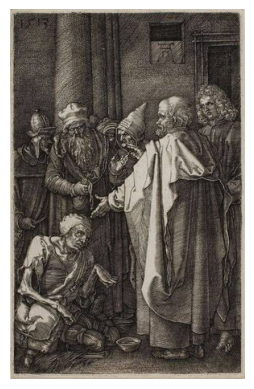

In [9]:

def output_image(image_path):
    # Read the image
    image = mpimg.imread(image_path)

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.show()
    return image

# Example usage:
image_path = "../data/train/Albrecht_Durer/Albrecht_Durer_4.jpg"  # Replace with the path to your image
imagetest=output_image(image_path)

SIFT

In [10]:
def extract_keypoints_and_descriptors(image):
    sift = cv2.SIFT_create()
    # Check the number of channels in the input image
    if len(image.shape) == 2:
        gray = image  
    elif len(image.shape) == 3 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    else:
        raise ValueError("Invalid input image format")

    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

In [11]:
keypoints, descriptors = extract_keypoints_and_descriptors(imagetest)
extract_keypoints_and_descriptors(imagetest)

((< cv2.KeyPoint 0x7fa577f96ea0>,
  < cv2.KeyPoint 0x7fa577f962d0>,
  < cv2.KeyPoint 0x7fa577fc9090>,
  < cv2.KeyPoint 0x7fa577fc90c0>,
  < cv2.KeyPoint 0x7fa577fc9120>,
  < cv2.KeyPoint 0x7fa577fc9150>,
  < cv2.KeyPoint 0x7fa577fc9180>,
  < cv2.KeyPoint 0x7fa577fc91b0>,
  < cv2.KeyPoint 0x7fa577fc91e0>,
  < cv2.KeyPoint 0x7fa577fc9210>,
  < cv2.KeyPoint 0x7fa577fc9240>,
  < cv2.KeyPoint 0x7fa577fc9270>,
  < cv2.KeyPoint 0x7fa577fc92a0>,
  < cv2.KeyPoint 0x7fa577fc92d0>,
  < cv2.KeyPoint 0x7fa577fc9300>,
  < cv2.KeyPoint 0x7fa577fc9330>,
  < cv2.KeyPoint 0x7fa577fc9360>,
  < cv2.KeyPoint 0x7fa577fc9390>,
  < cv2.KeyPoint 0x7fa577fc93c0>,
  < cv2.KeyPoint 0x7fa577fc93f0>,
  < cv2.KeyPoint 0x7fa577fc9420>,
  < cv2.KeyPoint 0x7fa577fc9450>,
  < cv2.KeyPoint 0x7fa577fc9480>,
  < cv2.KeyPoint 0x7fa577fc94b0>,
  < cv2.KeyPoint 0x7fa577fc94e0>,
  < cv2.KeyPoint 0x7fa577fc9510>,
  < cv2.KeyPoint 0x7fa577fc9540>,
  < cv2.KeyPoint 0x7fa577fc9570>,
  < cv2.KeyPoint 0x7fa577fc95a0>,
  < cv2.KeyPoi

Number of .jpg images found in folder ../data/train/Piet_Mondrian: 67


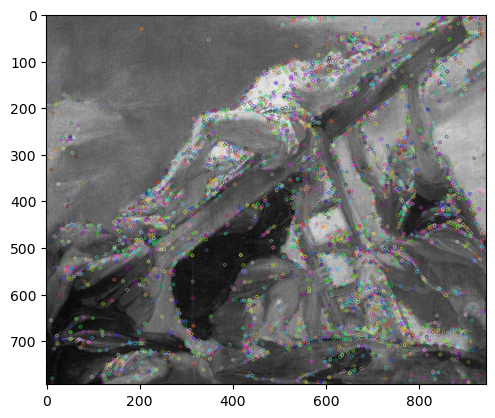

In [49]:
%matplotlib inline

#reading image
img1 = cv2.imread("../data/train/Peter_Paul_Rubens/Peter_Paul_Rubens_106.jpg")  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

images= extract_images_from_folder("../data/train/Piet_Mondrian")


            

keypoints_descriptors_dict = {}  # Define it as an empty dictionary
folder_path="../data/train/Piet_Mondrian"
images = [os.path.join(folder_path, image) for image in os.listdir(folder_path) if image.endswith(".jpg")]
print(f"Number of .jpg images found in folder {folder_path}: {len(images)}")
for filename in images:
    img = cv2.imread(filename)
    keypoints, descriptors = sift.detectAndCompute(img, None)
    keypoints_descriptors_dict[filename] = {'keypoints': keypoints, 'descriptors': descriptors}


img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

In [50]:

keypoints_descriptors_dict = {}  
for folder in os.listdir("../data/train"):  
    folder_path = os.path.join("../data/train", folder)
    if os.path.isdir(folder_path):
        images = [os.path.join(folder_path, image) for image in os.listdir(folder_path) if image.endswith(".jpg")]
        print(f"Number of .jpg images found in folder {folder_path}: {len(images)}")
        for filename in images:
            img = cv2.imread(filename)
            keypoints, descriptors = sift.detectAndCompute(img, None)
            keypoints_descriptors_dict[filename] = {'keypoints': keypoints, 'descriptors': descriptors}

Number of .jpg images found in folder ../data/train/Piet_Mondrian: 67
Number of .jpg images found in folder ../data/train/Diego_Velazquez: 102
Number of .jpg images found in folder ../data/train/Edgar_Degas: 561


Corrupt JPEG data: 10 extraneous bytes before marker 0xd9


Number of .jpg images found in folder ../data/train/Georges_Seurat: 34
Number of .jpg images found in folder ../data/train/Francisco_Goya: 232
Number of .jpg images found in folder ../data/train/Andrei_Rublev: 79
Number of .jpg images found in folder ../data/train/Alfred_Sisley: 207
Number of .jpg images found in folder ../data/train/Michelangelo: 39
Number of .jpg images found in folder ../data/train/Rene_Magritte: 155
Number of .jpg images found in folder ../data/train/Titian: 204
Number of .jpg images found in folder ../data/train/Edouard_Manet: 72
Number of .jpg images found in folder ../data/train/Giotto_di_Bondone: 95
Number of .jpg images found in folder ../data/train/Andy_Warhol: 144
Number of .jpg images found in folder ../data/train/Jan_van_Eyck: 64
Number of .jpg images found in folder ../data/train/El_Greco: 69
Number of .jpg images found in folder ../data/train/Eugene_Delacroix: 24
Number of .jpg images found in folder ../data/train/Pieter_Bruegel: 107
Number of .jpg image

In [51]:
image_dir = "../data/train"

for folder in os.listdir(image_dir): 
    folder_path = os.path.join(image_dir, folder)
    if os.path.isdir(folder_path):
        images = [os.path.join(folder_path, image) for image in os.listdir(folder_path) if image.endswith(".jpg")]
        print(f"Number of .jpg images found in folder {folder_path}: {len(images)}")
        for filename in images:
            try:
                img = cv2.imread(filename)
            # Check if image is None (could not be opened)
                if img is None:
                    print(f"Error opening image: {filename}")
            except Exception as e:
                print(f"Error processing image: {filename} - {e}")

# Get a list of all JPEG images in the directory

Number of .jpg images found in folder ../data/train/Piet_Mondrian: 67


Number of .jpg images found in folder ../data/train/Diego_Velazquez: 102
Number of .jpg images found in folder ../data/train/Edgar_Degas: 561


Corrupt JPEG data: 10 extraneous bytes before marker 0xd9


Number of .jpg images found in folder ../data/train/Georges_Seurat: 34
Number of .jpg images found in folder ../data/train/Francisco_Goya: 232
Number of .jpg images found in folder ../data/train/Andrei_Rublev: 79
Number of .jpg images found in folder ../data/train/Alfred_Sisley: 207
Number of .jpg images found in folder ../data/train/Michelangelo: 39
Number of .jpg images found in folder ../data/train/Rene_Magritte: 155
Number of .jpg images found in folder ../data/train/Titian: 204
Number of .jpg images found in folder ../data/train/Edouard_Manet: 72
Number of .jpg images found in folder ../data/train/Giotto_di_Bondone: 95
Number of .jpg images found in folder ../data/train/Andy_Warhol: 144
Number of .jpg images found in folder ../data/train/Jan_van_Eyck: 64
Number of .jpg images found in folder ../data/train/El_Greco: 69
Number of .jpg images found in folder ../data/train/Eugene_Delacroix: 24
Number of .jpg images found in folder ../data/train/Pieter_Bruegel: 107
Number of .jpg image

keypoints_descriptors_dict = {}
for image_path in images:
    keypoints, descriptors = extract_keypoints_and_descriptors(image_path)
    keypoints_descriptors_dict[tuple(keypoints)] = {'keypoints': keypoints, 'descriptors': descriptors}


img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

In [52]:
#print(keypoints_descriptors_dict)
print(type(keypoints_descriptors_dict))
print(type(dict))
#print(keypoints_descriptors_dict[1])

<class 'dict'>
<class 'type'>


In [53]:
import csv

In [54]:

def save_keypoints_and_descriptors_to_csv(data_dict, filename):

    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['image_name', 'x', 'y', 'size', 'angle', 'response', 'octave', 'class_id', 'descriptor'])
        for image_name, keypoints_descriptors in data_dict.items():
            #print(image_name)
            keypoints = keypoints_descriptors['keypoints']
            descriptors = keypoints_descriptors['descriptors']
            for kp, desc in zip(keypoints, descriptors):
                #print(image_name)
                row = [image_name] + list(kp.pt) + [kp.size, kp.angle, kp.response, kp.octave, kp.class_id] + list(desc)
                writer.writerow(row)
    print(f"SIFT keypoints and descriptors saved to {filename}")



#Loop to create files with different names
for i in range(50):  # You can adjust the range as needed
    filename = f"keypoints_and_descriptors_for_training_set_{i+1}.csv"  # Generate filename with index
    #with open(filename, 'w') as file:
    save_keypoints_and_descriptors_to_csv(keypoints_descriptors_dict, filename)
    print(f"File '{filename}' created successfully.")


In [55]:
#save_keypoints_and_descriptors_to_csv(keypoints_descriptors_dict, "keypoints_and_descriptors_for_training_set.csv")

import pickle

#Convert cv2.KeyPoint objects to a serializable format
def serialize_keypoints(keypoints):
    serialized_keypoints = []
    for kp in keypoints:
        serialized_kp = (kp.pt, kp.size, kp.angle, kp.response, kp.octave, kp.class_id)
        serialized_keypoints.append(serialized_kp)
    return serialized_keypoints

#Convert the dictionary to a serializable format before saving
serializable_dict = {}
for filename, data in keypoints_descriptors_dict.items():
    keypoints = data['keypoints']
    descriptors = data['descriptors']
    serialized_keypoints = serialize_keypoints(keypoints)
    serializable_dict[filename] = {'keypoints': serialized_keypoints, 'descriptors': descriptors}

#Specify the file path where you want to save the dictionary
file_path = "keypoints_descriptors_dict_train.pkl"

#open the file in binary write mode
with open(file_path, 'wb') as file:
    # Serialize and write the dictionary to the file
    pickle.dump(serializable_dict, file)

print(f"Dictionary saved to {file_path}")



In [56]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
import json 
import pickle

file_path = 'dictionary_sift.pickle'

def serialize_keypoints(keypoints):
    serialized_keypoints = []
    for kp in keypoints:
        serialized_kp = {
            'pt': (kp.pt[0], kp.pt[1]),
            'size': kp.size,
            'angle': kp.angle,
            'response': kp.response,
            'octave': kp.octave,
            'class_id': kp.class_id
        }
        serialized_keypoints.append(serialized_kp)
    return serialized_keypoints

# Convert dictionary values containing cv2.KeyPoint objects to serializable format
for key, value in keypoints_descriptors_dict.items():
    keypoints_descriptors_dict[key]['keypoints'] = serialize_keypoints(value['keypoints'])

file_path = "keypoints_descriptors_dict.pickle"
with open(file_path, 'wb') as f:
    pickle.dump(keypoints_descriptors_dict, f)


KeyboardInterrupt: 

In [ ]:
with open('keypoints_descriptors_dict.pickle', 'rb') as f:
    # Load the dictionary from the file
    loaded_data = pickle.load(f)

print(loaded_data)

{}


In [58]:
train_names = list_folders_in_directory("../data/train")

In [62]:
dictionary_container=dict()

for i in range(len(train_names)):
    found_keys = [key for key in keypoints_descriptors_dict.keys() if key.startswith(train_names[i])]
    dictionary_name=f"sub_dict_{train_names[i]}"
    #print(f"sub_dict_{train_names[i]}")
    dictionary_container[dictionary_name] = {}
    if found_keys:
        for key in found_keys:
            #print(key, keypoints_descriptors_dict[key])
            #print(train_names[i])
            dictionary_container[dictionary_name][key]=keypoints_descriptors_dict[key]
           #print(dictionary_container[dictionary_name][key])
    #print(dictionary_name)

In [63]:
def quantize_descriptors(descriptors, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(descriptors)
    return kmeans

In [74]:
clusters = []


for key, value in dictionary_container.items():
    sift_descriptors = []
    for image_key, sub_dicts in value.items():
        keypoints = sub_dicts['descriptors']
        sift_descriptors.append((image_key, descriptors))
    cluster=quantize_descriptors(sift_descriptors, 1)
    clusters.append(cluster)




ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (67, 2) + inhomogeneous part.

In [ ]:
#train_names

['train/Piet_Mondrian',
 'train/Diego_Velazquez',
 'train/Edgar_Degas',
 'train/Georges_Seurat',
 'train/Francisco_Goya',
 'train/Andrei_Rublev',
 'train/Alfred_Sisley',
 'train/Michelangelo',
 'train/Rene_Magritte',
 'train/Titian',
 'train/Edouard_Manet',
 'train/Giotto_di_Bondone',
 'train/Andy_Warhol',
 'train/Jan_van_Eyck',
 'train/El_Greco',
 'train/Eugene_Delacroix',
 'train/Pieter_Bruegel',
 'train/Paul_Klee',
 'train/Paul_Gauguin',
 'train/Claude_Monet',
 'train/Marc_Chagall',
 'train/Sandro_Botticelli',
 'train/Henri_de_Toulouse-Lautrec',
 'train/Kazimir_Malevich',
 'train/Paul_Cezanne',
 'train/Camille_Pissarro',
 'train/Salvador_Dali',
 'train/Diego_Rivera',
 'train/Vasiliy_Kandinskiy',
 'train/Gustav_Klimt',
 'train/Vincent_van_Gogh',
 'train/Gustave_Courbet',
 'train/Amedeo_Modigliani',
 'train/Henri_Matisse',
 'train/Frida_Kahlo',
 'train/Pablo_Picasso',
 'train/Jackson_Pollock',
 'train/Albrecht_Durer',
 'train/Pierre-Auguste_Renoir',
 'train/Joan_Miro',
 'train/Peter_P

In [ ]:
def generate_histogram(keypoints, kmeans, k):
    histogram = np.zeros(k)
    labels = kmeans.predict(descriptors)
    for label in labels:
        histogram[label] += 1
    return histogram

In [ ]:
def assign_visual_words(descriptors, visual_words):
    labels = visual_words.predict(descriptors)
    return labels

labels=assign_visual_words()

#Load your dataset and extract features
dataset = [...]  # List of image paths with their corresponding classes
descriptors_list = []
labels_list = []

for image_path, class_label in dataset:
    keypoints, descriptors = extract_sift_features(image_path)
    descriptors_list.append(descriptors)
    labels_list.append(class_label)

#Step 2: Cluster Descriptors
descriptors_concatenated = np.concatenate(descriptors_list, axis=0)
visual_words = cluster_descriptors(descriptors_concatenated, num_clusters)

#Step 3-4: Assign Visual Words and Create Histograms
histograms = []
for descriptors in descriptors_list:
    labels = assign_visual_words(descriptors, visual_words)
    histogram = create_histograms(labels, num_clusters)
    histograms.append(histogram)

#Step 5: Normalize Histograms
normalized_histograms = normalize_histograms(histograms)